## 1.Set up and Load the data

 1.1 Install Dependencies and Setup

In [153]:
!pip install tensorflow tensorflow-gpu opencv-python matplotlib

In [154]:
import tensorflow as tf
import os

In [155]:
gpus = tf.config.experimental.list_logical_devices('GPU')
len(gpus)

0

In [156]:
gpus = tf.config.experimental.list_logical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu,True)

In [157]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import cv2
import imghdr
import os

In [158]:
data_dir = 'data'

In [159]:
image_exts = ['jpg', 'jpeg', 'png','bmp']

In [160]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        print(image)


0a5ae820-7051-4495-bcca-61bf02897472.jpg
1-FN5101_001_1024x.jpg
1000_F_176979696_hqfioFYq7pX13dmiu9ENrpsHZy1yM3Dt.jpg
10020161_LXL1_20210901.jpg
16438126-0-image-a-8_1563971392042.jpg
20Ounce_NYAS-Apples2.png
25.jpg
2734949408_9ef81bac09_z_16x9.jpg
35552.jpeg
383418-grt-Apple-Benefits-Facebook-1200x628.jpg
3d90a2c562992fe9bb692ef9c2df6623.jpg
4374977.jpg
47425871_101.jpg
47429859_401.jpg
5da6fce9e6a9189f10f203b7a33ce305.jpg
800px-Apple_red_delicius_flower_end.jpg
800px-Golden_Delicious_apples.jpg
90111869_XL1_20211123.jpg
a-blue-apple-fruit-isolated-on-white-background-WWK2Y0.jpg
Aldia-Apple-Filling.jpg
Anna_Apple_3_650x.jpg
AOh-ky0m7gFdEZ43FFE_o6w-FkSRcvlACy-pZf-_NPzjs64-c-mo.jpg
apple-2711629_1920-1200x900.jpg
apple-5186339_960_720.jpg
apple-5902283_1280.png
apple-apple-tree-red-fruit.jpg
apple-fruit-design-vector-23321855.jpg
apple-fruit-for-menu.jpg
apple-fruit-hand-drawn-outline-260nw-1075440242.jpg
Apple-Fruit-Illustration-Vector-Icon-Graphics-5727468-1.jpg
apple-fruit-sketch-vec

In [235]:
import pathlib
data_dir = pathlib.Path(data_dir)
image_count= len(list(data_dir.glob('*/*.jpg')))
image_count

601

In [247]:
batch_size = 32
img_height = 180
img_width = 180
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 733 files belonging to 3 classes.
Using 587 files for training.


In [248]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 733 files belonging to 3 classes.
Using 146 files for validation.


In [249]:
class_names = train_ds.class_names
print(class_names)

['apple', 'banana', 'orange']


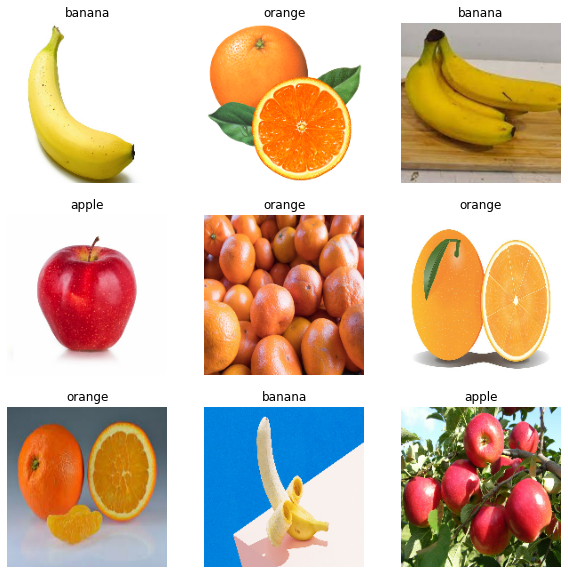

In [250]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [242]:
list =data_dir.glob('apple/*')

<generator object Path.glob at 0x000001BD17CEB970>

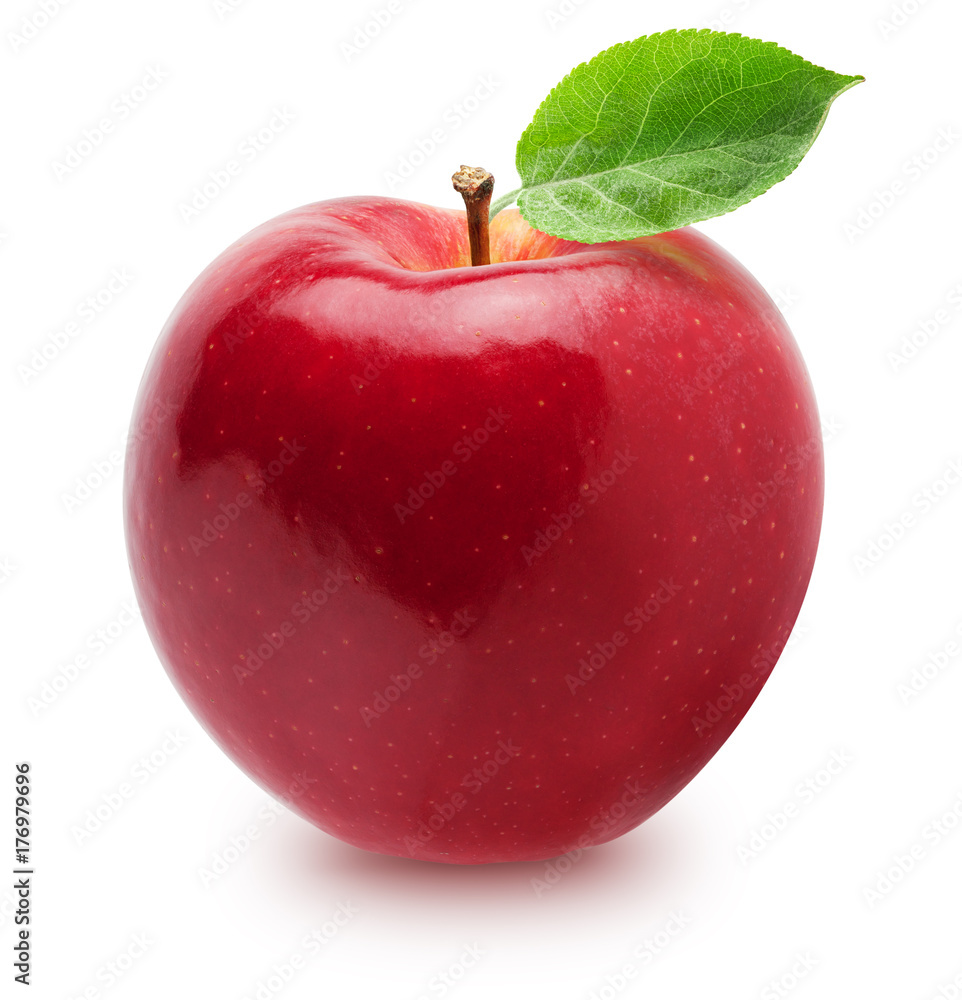

In [240]:
apple = list(data_dir.glob('apple/*'))
Image.open(str(apple[0]))

(349, 349, 3)


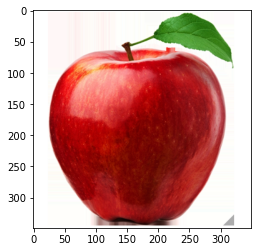

In [161]:
img = cv2.imread(os.path.join('data','apple','apple_1.jpg'))
print(img.shape)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_RGB2BGR))
plt.show()

In [169]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with Image {}'.format(image_path))

Image not in ext list data\apple\4374977.jpg
Image not in ext list data\apple\apple-fruit-hand-drawn-outline-260nw-1075440242.jpg
Image not in ext list data\apple\apples-101-about-1440x810.jpg
Image not in ext list data\apple\apples-on-a-tree-branch.jpg
Image not in ext list data\apple\apple_67.jpg
Image not in ext list data\apple\apple_73.jpg
Image not in ext list data\banana\all-about-bananas-nutrition-facts-health-benefits-recipes-and-more-rm-722x406.jpg
Image not in ext list data\banana\banana-herb-berry-01-1140x1520.jpg
Image not in ext list data\banana\bananas-bunch.jpg
Image not in ext list data\banana\Bananas_1.jpg
Image not in ext list data\banana\banana_32.jpg
Image not in ext list data\banana\banana_40.jpg
Image not in ext list data\banana\Cavendish_Banana_DS.jpg
Image not in ext list data\orange\27715256-orange-fruit-with-cut-isolated-on-white.jpg
Image not in ext list data\orange\57051899-fresh-orange-fruit-with-drops-isolated-on-white.jpg
Image not in ext list data\orange

In [170]:
tf.data.Dataset

tensorflow.python.data.ops.dataset_ops.DatasetV2

In [171]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 733 files belonging to 3 classes.


In [172]:
data

<BatchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [173]:
data_iterator = data.as_numpy_iterator()

In [174]:
data_iterator

In [175]:
# Get another batch from the iterator
batch = data_iterator.next()

In [176]:
batch[0].shape

(32, 256, 256, 3)

In [177]:
# Class 0 = apple
# Class 1 = banana
# Class 2 = orange
batch[1]

array([1, 2, 2, 0, 1, 2, 2, 0, 0, 1, 1, 2, 2, 1, 2, 1, 0, 0, 2, 0, 0, 0,
       0, 1, 0, 0, 2, 0, 2, 2, 0, 1])

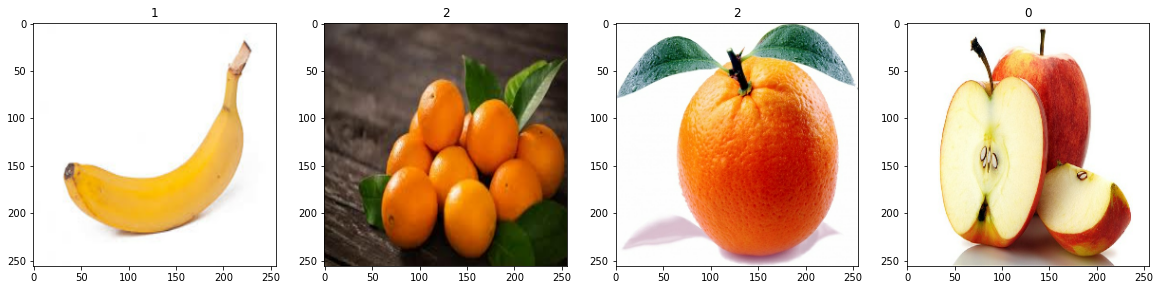

In [178]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [179]:
scaled = batch[0]/255
scaled.max()

1.0

## 2.Preprocessing Data

2.1 Scaled Data

In [180]:
data = data.map(lambda x, y: (x/255, y))


In [181]:
scaled_iterator = data.as_numpy_iterator().next()[0].max()

In [182]:
scaled_iterator

1.0

2.2 Split the data

In [183]:
len(data)

23

In [184]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)+1
test_size = int(len(data)*.1)+1

In [185]:
print(train_size)
print(val_size)
print(test_size)

16
5
3


In [186]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [187]:
len(test)

2

## 3.Deep Model

3.1 Build Deep Learning Model

In [188]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense,  Flatten, Dropout

In [189]:
model = Sequential()

In [190]:
model.add(Conv2D(16,(3,3),activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(3, activation='softmax'))


In [191]:
model.compile(optimizer='adam', loss ='sparse_categorical_crossentropy', metrics=['accuracy'])

In [192]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 127, 127, 16)     0         
 g2D)                                                            
                                                                 
 conv2d_25 (Conv2D)          (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 62, 62, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_26 (Conv2D)          (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_23 (MaxPoolin  (None, 30, 30, 16)      

In [193]:
logdir='log'

In [194]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [195]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
16/16 [==============================] - 17s 961ms/step - loss: 1.2137 - accuracy: 0.4961 - val_loss: 0.8187 - val_accuracy: 0.8000
Epoch 2/20
16/16 [==============================] - 15s 880ms/step - loss: 0.5787 - accuracy: 0.7891 - val_loss: 0.5339 - val_accuracy: 0.8062
Epoch 3/20
16/16 [==============================] - 14s 860ms/step - loss: 0.4097 - accuracy: 0.8750 - val_loss: 0.3518 - val_accuracy: 0.8625
Epoch 4/20
16/16 [==============================] - 14s 833ms/step - loss: 0.3796 - accuracy: 0.8848 - val_loss: 0.4949 - val_accuracy: 0.7937
Epoch 5/20
16/16 [==============================] - 14s 833ms/step - loss: 0.3374 - accuracy: 0.8945 - val_loss: 0.3164 - val_accuracy: 0.8813
Epoch 6/20
16/16 [==============================] - 14s 849ms/step - loss: 0.2656 - accuracy: 0.9238 - val_loss: 0.2105 - val_accuracy: 0.9312
Epoch 7/20
16/16 [==============================] - 14s 830ms/step - loss: 0.2249 - accuracy: 0.9258 - val_loss: 0.1842 - val_accuracy: 0.9250

In [196]:
hist.history

{'loss': [1.2136739492416382,
  0.5787341594696045,
  0.40969228744506836,
  0.37956753373146057,
  0.3374267518520355,
  0.26555293798446655,
  0.22492866218090057,
  0.14670154452323914,
  0.17933389544487,
  0.1306847780942917,
  0.09829753637313843,
  0.09756062924861908,
  0.06460615992546082,
  0.05063926801085472,
  0.06441899389028549,
  0.07935090363025665,
  0.06042376905679703,
  0.07349727302789688,
  0.0657309964299202,
  0.05204889923334122],
 'accuracy': [0.49609375,
  0.7890625,
  0.875,
  0.884765625,
  0.89453125,
  0.923828125,
  0.92578125,
  0.955078125,
  0.9453125,
  0.9609375,
  0.98046875,
  0.962890625,
  0.9765625,
  0.982421875,
  0.97265625,
  0.970703125,
  0.982421875,
  0.970703125,
  0.982421875,
  0.982421875],
 'val_loss': [0.8186947107315063,
  0.5339158773422241,
  0.35183870792388916,
  0.49490994215011597,
  0.3163856267929077,
  0.21048489212989807,
  0.18421614170074463,
  0.12797579169273376,
  0.08320204168558121,
  0.17797818779945374,
  0.14

3.3 Plot Performace

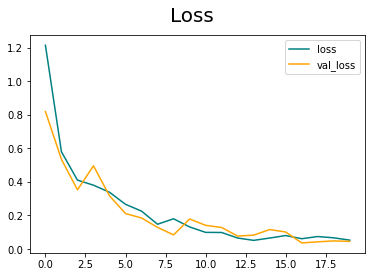

In [197]:
fig = plt.figure()
plt.plot(hist.history['loss'],color='teal',label='loss')
plt.plot(hist.history['val_loss'],color='orange',label='val_loss')
fig.suptitle('Loss',fontsize=20)
plt.legend(loc='upper right')
plt.show()

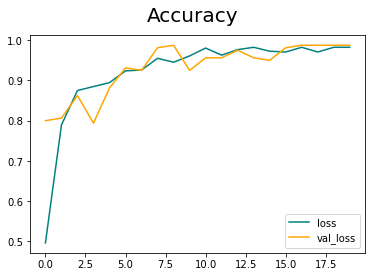

In [198]:
fig = plt.figure()
plt.plot(hist.history['accuracy'],color='teal',label='loss')
plt.plot(hist.history['val_accuracy'],color='orange',label='val_loss')
fig.suptitle('Accuracy',fontsize=20)
plt.legend(loc='lower right')
plt.show()

## 4.Evaluate Performance

4.1 Evaluate

In [200]:
from tensorflow.keras.metrics import Accuracy

In [201]:
acc = Accuracy()


In [211]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)



1/1 [==============================] - 0s 116ms/step


In [207]:
y.shape

(29,)

In [208]:
yhat.shape

(29, 3)

4.2 Test

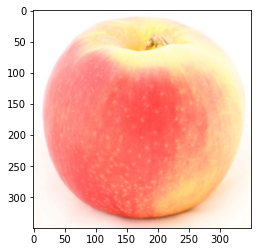

In [212]:
img = cv2.imread('apple_78.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

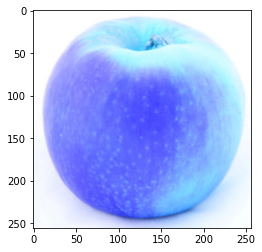

In [213]:
resize = tf.image.resize(img, (256,256))
resize = resize.numpy().astype(int)
plt.imshow(resize)
plt.show()

In [214]:
resize.shape

(256, 256, 3)

In [215]:
np.expand_dims(resize,0).shape

(1, 256, 256, 3)

In [216]:
yhat = model.predict(np.expand_dims(resize/255,0))

1/1 [==============================] - 0s 32ms/step


In [220]:
yhat.shape

(1, 3)

In [221]:
yhat

array([[0.00260166, 0.99174094, 0.00565743]], dtype=float32)

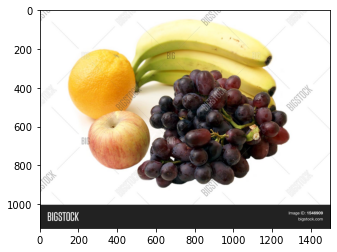

In [222]:
img = cv2.imread('mixed_23.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

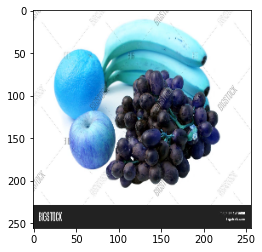

In [223]:
resize = tf.image.resize(img, (256,256))
resize = resize.numpy().astype(int)
plt.imshow(resize)
# plt.imshow(cv2.cvtColor(resize.numpy().astype(int), cv2.COLOR_BGR2RGB))
plt.show()

In [224]:
yhat = model.predict(np.expand_dims(resize/255, 0))
yhat

1/1 [==============================] - 0s 28ms/step


array([[0.10123701, 0.8964831 , 0.00227987]], dtype=float32)

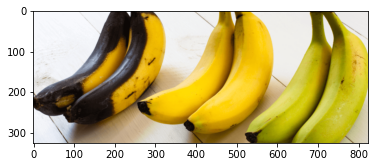

In [225]:
img = cv2.imread('banana_87.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

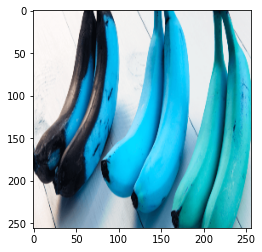

In [226]:
resize = tf.image.resize(img, (256,256))
resize = resize.numpy().astype(int)
plt.imshow(resize)
# plt.imshow(cv2.cvtColor(resize.numpy().astype(int), cv2.COLOR_BGR2RGB))
plt.show()

In [227]:
yhat = model.predict(np.expand_dims(resize/255, 0))
yhat

1/1 [==============================] - 0s 24ms/step


array([[5.2596570e-05, 9.9680257e-01, 3.1447550e-03]], dtype=float32)

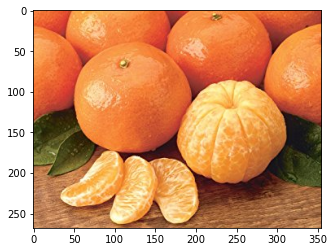

In [228]:
img = cv2.imread('orange_90.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

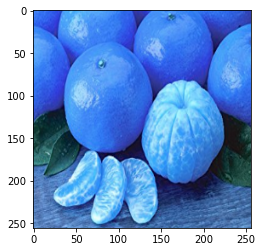

In [229]:
resize = tf.image.resize(img, (256,256))
resize = resize.numpy().astype(int)
plt.imshow(resize)
# plt.imshow(cv2.cvtColor(resize.numpy().astype(int), cv2.COLOR_BGR2RGB))
plt.show()

In [230]:
yhat = model.predict(np.expand_dims(resize/255, 0))
yhat

1/1 [==============================] - 0s 23ms/step


array([[1.9686391e-05, 9.6609628e-01, 3.3884097e-02]], dtype=float32)